In [ ]:
import numpy as np
import pandas as pd
import glob
import time
import os
import matplotlib.pyplot as plt
import keras
import cv2
from google.colab.patches import cv2_imshow
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

file1 = '/content/drive/MyDrive/data/normal_data.csv'
file2 = '/content/drive/MyDrive/data/xss_data.csv'

df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

df = pd.concat([df1, df2], ignore_index=True)

df = df.drop_duplicates()
df = df.drop(columns=['hl'])

df['label'].astype(int)

df
# result.to_csv('/home/final_dataset.csv', index=False)

,html_tag_main,html_tag_section,html_tag_script,html_tag_iframe,html_tag_meta,html_tag_applet,html_tag_object,html_tag_embed,html_tag_link,html_tag_svg,...,url_event_ondblclick,url_event_onscroll,url_event_oninput,url_redirection,url_number_keywords_param,url_number_keywords_evil,url_cookie,url_number_domain,url_number_ip,label
0,0,0,36,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.0
1,0,0,36,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.0
2,0,0,0,0,14,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.0
3,0,0,39,11,26,0,0,0,34,0,...,0,0,0,0,0,0,0,1,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75460,0,0,26,0,2,0,0,0,4,0,...,0,0,0,0,1,4,0,1,0,1.0
75461,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4,0,1,0,1.0
75462,3,0,0,0,14,0,0,0,14,0,...,0,0,0,0,0,5,1,1,0,1.0
75463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,0,1,0,1.0


In [ ]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df

,html_tag_main,html_tag_section,html_tag_script,html_tag_iframe,html_tag_meta,html_tag_applet,html_tag_object,html_tag_embed,html_tag_link,html_tag_svg,...,url_event_ondblclick,url_event_onscroll,url_event_oninput,url_redirection,url_number_keywords_param,url_number_keywords_evil,url_cookie,url_number_domain,url_number_ip,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4,0,1,0,1.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4,0,1,0,1.0
3,0,0,2,0,8,0,0,0,2,0,...,0,0,0,0,0,0,0,1,0,0.0
4,0,0,0,0,8,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74697,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.0
74698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.0
74699,0,16,52,0,38,0,0,0,22,72,...,0,0,0,0,0,0,0,1,0,0.0
74700,2,24,49,0,52,0,0,0,72,225,...,0,0,0,0,0,0,0,1,0,0.0


In [ ]:
label_counts = df['label'].value_counts()
label_counts

0.0    58214
1.0    16488
Name: label, dtype: int64

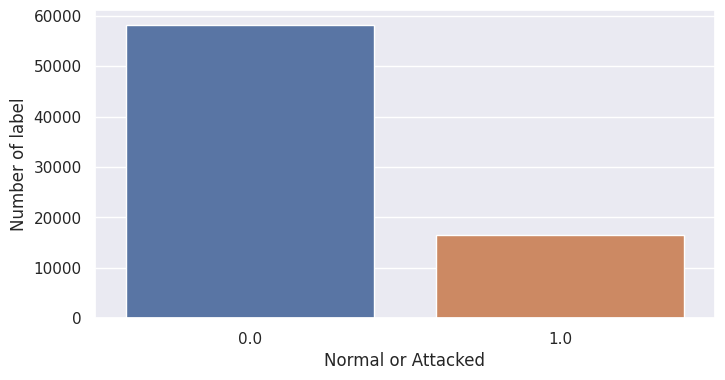

In [ ]:
sns.set(rc={'figure.figsize':(8, 4)})
plt.xlabel('Status')
sns.set_theme()
ax = sns.countplot(x='label', data=df)
ax.set(xlabel='Normal or Attacked', ylabel='Number of label')
plt.show()

In [ ]:
X = df.drop(columns=['label'])
Y = df['label']

rf = RandomForestClassifier(random_state=42)
sfm = SelectFromModel(rf, threshold='4*median')
sfm.fit(X, Y)
selected_feature_indices = sfm.get_support()
selected_feature_names = X.columns[selected_feature_indices]

selected_feature_names = list(selected_feature_names)
selected_feature_names.append('label')

print(len(selected_feature_names))
print(selected_feature_names)


80
['html_tag_main', 'html_tag_section', 'html_tag_script', 'html_tag_iframe', 'html_tag_meta', 'html_tag_link', 'html_tag_svg', 'html_tag_form', 'html_tag_div', 'html_tag_style', 'html_tag_video', 'html_tag_img', 'html_tag_input', 'html_tag_textarea', 'html_attr_selected', 'html_attr_target', 'html_attr_class', 'html_attr_action', 'html_attr_background', 'html_attr_href', 'html_attr_src', 'html_attr_http-equiv', 'html_event_onchange', 'html_event_onclick', 'html_event_onload', 'html_event_onmouseout', 'html_event_onmouseover', 'html_event_onsubmit', 'js_dom_document', 'js_dom_window', 'js_dom_navigator', 'js_dom_location', 'js_dom_localStorage', 'js_dom_sessionStorage', 'js_dom_history', 'js_dom_console', 'js_dom_alert', 'js_prop_cookie', 'js_prop_referrer', 'js_prop_innerHTML', 'js_prop_value', 'js_prop_href', 'js_prop_src', 'js_prop_classList', 'js_prop_getAttribute', 'js_prop_setAttribute', 'js_method_write', 'js_method_getElementsByTagName', 'js_method_getElementById', 'js_method_

In [ ]:
df = df[selected_feature_names]
df

,html_tag_main,html_tag_section,html_tag_script,html_tag_iframe,html_tag_meta,html_tag_link,html_tag_svg,html_tag_form,html_tag_div,html_tag_style,...,url_attr_data,url_attr_src,url_event_onerror,url_event_onload,url_event_onmouseover,url_number_keywords_param,url_number_keywords_evil,url_cookie,url_number_domain,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,0,1,1.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,0,1,1.0
3,0,0,2,0,8,2,0,0,24,0,...,0,0,0,0,0,0,0,0,1,0.0
4,0,0,0,0,8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74697,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.0
74698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.0
74699,0,16,52,0,38,22,72,0,647,8,...,0,0,0,0,0,0,0,0,1,0.0
74700,2,24,49,0,52,72,225,7,3433,16,...,0,0,0,0,0,0,0,0,1,0.0


In [ ]:
df = df.sample(frac=1, random_state=42)
df.reset_index(drop=True, inplace=True)

print(df.dtypes)
print(df.isna().any().any())
df

html_tag_main                  int64
html_tag_section               int64
html_tag_script                int64
html_tag_iframe                int64
html_tag_meta                  int64
                              ...   
url_number_keywords_param      int64
url_number_keywords_evil       int64
url_cookie                     int64
url_number_domain              int64
label                        float64
Length: 80, dtype: object
False


,html_tag_main,html_tag_section,html_tag_script,html_tag_iframe,html_tag_meta,html_tag_link,html_tag_svg,html_tag_form,html_tag_div,html_tag_style,...,url_attr_data,url_attr_src,url_event_onerror,url_event_onload,url_event_onmouseover,url_number_keywords_param,url_number_keywords_evil,url_cookie,url_number_domain,label
0,0,0,79,3,20,10,0,26,337,4,...,0,0,0,0,0,0,2,0,2,1.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,5,0,1,1.0
3,0,0,4,0,14,0,0,2,0,0,...,0,0,0,0,0,0,0,0,1,0.0
4,0,94,24,3,22,22,46,25,507,27,...,0,0,0,0,0,0,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74697,0,0,14,0,10,22,29,6,132,0,...,0,0,0,0,0,0,0,0,1,0.0
74698,0,0,9,0,10,12,0,7,77,0,...,0,0,0,0,0,0,0,0,1,0.0
74699,0,0,36,0,4,0,0,3,58,9,...,0,0,0,0,0,0,0,0,1,0.0
74700,3,0,2,0,16,36,12,0,94,0,...,0,0,0,0,0,1,4,0,1,1.0


In [ ]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = df.columns[:-1]
sta = StandardScaler()
df[columns_to_scale] = sta.fit_transform(df[columns_to_scale])

df

,html_tag_main,html_tag_section,html_tag_script,html_tag_iframe,html_tag_meta,html_tag_link,html_tag_svg,html_tag_form,html_tag_div,html_tag_style,...,url_attr_data,url_attr_src,url_event_onerror,url_event_onload,url_event_onmouseover,url_number_keywords_param,url_number_keywords_evil,url_cookie,url_number_domain,label
0,-0.179496,-0.170091,0.446737,0.129495,0.032555,-0.120622,-0.074342,0.413307,-0.111615,-0.080247,...,-0.118531,-0.160631,-0.04942,-0.052841,-0.033552,-0.300544,0.676960,-0.212723,6.957561,1.0
1,-0.179496,-0.170091,-0.282689,-0.106595,-0.212650,-0.263838,-0.074342,-0.089663,-0.154199,-0.101588,...,-0.118531,-0.160631,-0.04942,-0.052841,-0.033552,-0.300544,-0.497576,-0.212723,-0.116958,0.0
2,-0.179496,-0.170091,-0.282689,-0.106595,-0.212650,-0.263838,-0.074342,-0.089663,-0.154199,-0.101588,...,-0.118531,-0.160631,-0.04942,-0.052841,-0.033552,2.770337,2.438764,-0.212723,-0.116958,1.0
3,-0.179496,-0.170091,-0.245756,-0.106595,-0.041006,-0.263838,-0.074342,-0.050973,-0.154199,-0.101588,...,-0.118531,-0.160631,-0.04942,-0.052841,-0.033552,-0.300544,-0.497576,-0.212723,-0.116958,0.0
4,-0.179496,0.986608,-0.061091,0.129495,0.057076,0.051237,-0.030568,0.393962,-0.090133,0.042463,...,-0.118531,-0.160631,-0.04942,-0.052841,-0.033552,-0.300544,-0.497576,-0.212723,-0.116958,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74697,-0.179496,-0.170091,-0.153424,-0.106595,-0.090047,0.051237,-0.046746,0.026407,-0.137519,-0.101588,...,-0.118531,-0.160631,-0.04942,-0.052841,-0.033552,-0.300544,-0.497576,-0.212723,-0.116958,0.0
74698,-0.179496,-0.170091,-0.199590,-0.106595,-0.090047,-0.091979,-0.074342,0.045752,-0.144469,-0.101588,...,-0.118531,-0.160631,-0.04942,-0.052841,-0.033552,-0.300544,-0.497576,-0.212723,-0.116958,0.0
74699,-0.179496,-0.170091,0.049707,-0.106595,-0.163609,-0.263838,-0.074342,-0.031628,-0.146870,-0.053571,...,-0.118531,-0.160631,-0.04942,-0.052841,-0.033552,-0.300544,-0.497576,-0.212723,-0.116958,0.0
74700,0.595156,-0.170091,-0.264223,-0.106595,-0.016486,0.251740,-0.062923,-0.089663,-0.142321,-0.101588,...,-0.118531,-0.160631,-0.04942,-0.052841,-0.033552,2.770337,1.851496,-0.212723,-0.116958,1.0


In [ ]:
y=df['label'].values
df.pop(df.columns[-1])
df.shape

(74702, 79)

In [ ]:
data = np.zeros((df.shape[0],df.shape[1]))
data[:df.shape[0],:df.shape[1]] = df.values

data = data.reshape(df.shape[0],1,df.shape[1],1)
data.shape


(74702, 1, 79, 1)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support

def plot_confusion_matrix(confusion_matrix, class_names):
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, square=True, xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

def evaluate_classification_with_plot(truth, predicted, threshold=0.5, class_names=['Bengin', 'Malicious']):
    predicted_binary = (predicted > threshold).astype(int)

    confusion = confusion_matrix(truth, predicted_binary)

    accuracy = accuracy_score(truth, predicted_binary)
    print("Accuracy:", accuracy)

    precision, recall, f1, _ = precision_recall_fscore_support(truth, predicted_binary, average='binary')
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1)

    plot_confusion_matrix(confusion, class_names)

    return accuracy

In [ ]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(data, y, test_size=0.2, random_state=42)

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D,Flatten,Dropout,MaxPool2D, BatchNormalization

In [ ]:
model=tf.keras.models.Sequential([
    tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(324,(3), activation=tf.nn.relu, input_shape=(df.shape[1],1))),
    tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPooling1D(2,2, padding = 'same')),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Conv1D(131,(3), activation=tf.nn.relu, input_shape=(df.shape[1],1))),
    tf.keras.layers.TimeDistributed(tf.keras.layers.MaxPooling1D(2,2, padding = 'same')),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Flatten()),

    tf.keras.layers.LSTM(78, activation='relu'),

    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(65, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(98, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(109, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_log = model.fit(trainX, trainY, batch_size=256, epochs=50, verbose=1, validation_data=( testX,  testY) )
model.summary()

Epoch 1/50
234/234 [==============================] - 8s 20ms/step - loss: 0.1051 - accuracy: 0.9696 - val_loss: 0.0532 - val_accuracy: 0.9852
Epoch 2/50
234/234 [==============================] - 3s 15ms/step - loss: 0.0500 - accuracy: 0.9864 - val_loss: 0.0515 - val_accuracy: 0.9857
Epoch 3/50
234/234 [==============================] - 3s 14ms/step - loss: 0.0448 - accuracy: 0.9874 - val_loss: 0.0494 - val_accuracy: 0.9865
Epoch 4/50
234/234 [==============================] - 3s 14ms/step - loss: 0.0443 - accuracy: 0.9878 - val_loss: 0.0506 - val_accuracy: 0.9863
Epoch 5/50
234/234 [==============================] - 4s 17ms/step - loss: 0.0426 - accuracy: 0.9881 - val_loss: 0.0470 - val_accuracy: 0.9868
Epoch 6/50
234/234 [==============================] - 4s 15ms/step - loss: 0.0424 - accuracy: 0.9880 - val_loss: 0.0451 - val_accuracy: 0.9871
Epoch 7/50
234/234 [==============================] - 3s 14ms/step - loss: 0.0412 - accuracy: 0.9883 - val_loss: 0.0455 - val_accuracy: 0.9867

467/467 [==============================] - 1s 3ms/step
Accuracy: 0.9887557727059768
Precision: 0.9925203252032521
Recall: 0.9546449796684392
F1-Score: 0.9732142857142857


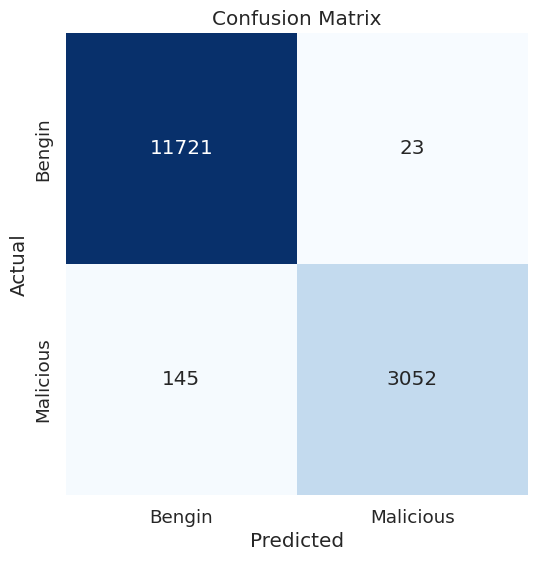

In [ ]:
pred=model.predict(testX)
accuracy = evaluate_classification_with_plot(testY, pred, class_names=['Bengin', 'Malicious'])

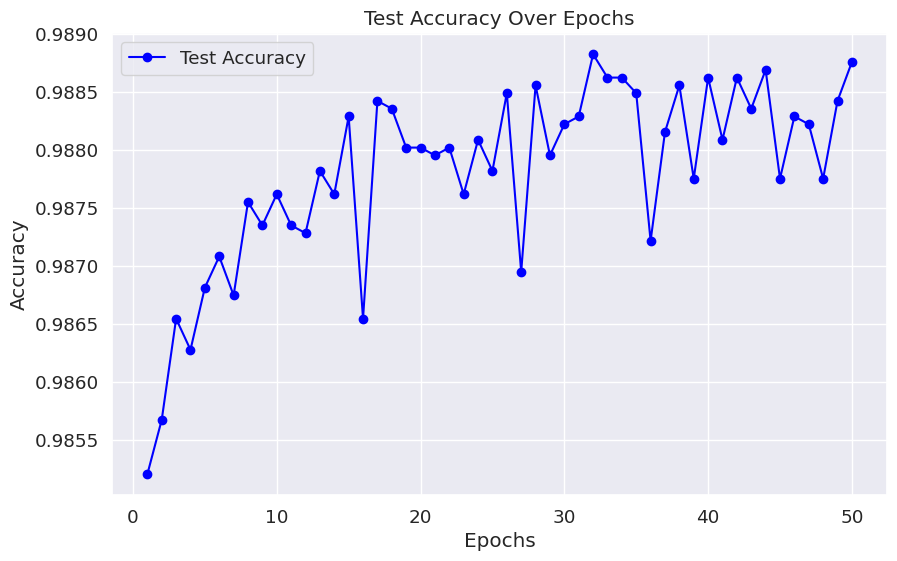

In [ ]:
import matplotlib.pyplot as plt

history = model_log.history

epochs = range(1, len(history['accuracy']) + 1)

test_acc = history['val_accuracy']

plt.figure(figsize=(10, 6))
plt.plot(epochs, test_acc, label='Test Accuracy', color='blue', marker='o')
plt.title('Test Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
